## Imputacion de datos

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.reset_option("display.max_rows")
pd.set_option('display.max_columns', None)
filename = 'Data2024.csv'
columns = ['fecha', 'turno', 'horas_operacion', 'toneladas', 'au_cabeza', 'ag_cabeza', 'pb_cabeza', 'zn_cabeza', 'fe_cabeza', 'cu_cabeza', 'au_concentrado_pb', 'ag_concentrado_pb', 'pb_concentrado_pb', 'zn_concentrado_pb', 'fe_concentrado_pb', 'cu_concentrado_pb', 'au_colas_pb', 'ag_colas_pb', 'pb_colas_pb', 'zn_colas_pb', 'fe_colas_pb', 'cu_colas_pb', 'au_concentrado_zn', 'ag_concentrado_zn', 'pb_concentrado_zn', 'zn_concentrado_zn', 'fe_concentrado_zn', 'cu_concentrado_zn', 'au_colas_zn', 'ag_colas_zn', 'pb_colas_zn', 'zn_colas_zn', 'fe_colas_zn', 'cu_colas_zn', 'au_concentrado_fe', 'ag_concentrado_fe', 'pb_concentrado_fe', 'zn_concentrado_fe', 'fe_concentrado_fe', 'cu_concentrado_fe', 'au_colas_fe', 'ag_colas_fe', 'pb_colas_fe', 'zn_colas_fe', 'fe_colas_fe', 'cu_colas_fe']
df = pd.read_csv(filename, names=columns, header=None, index_col=False)

df_dirty = df.copy()

In [58]:
df

fecha  turno  horas_operacion  toneladas  au_cabeza  ag_cabeza  \
0    02/01/2024      1             8.20    1341.70      1.030     395.81   
1    02/01/2024      2            10.00    1736.90      1.040     350.60   
2    03/01/2024      1            11.50    1955.00      1.500     386.74   
3    03/01/2024      2            11.70    2068.40      1.920     308.41   
4    04/01/2024      1            10.60    1857.10      1.140     286.74   
..          ...    ...              ...        ...        ...        ...   
647  29/12/2024      2            11.73    1936.16      1.199     448.90   
648  30/12/2024      1            10.47    1817.84      1.100     447.02   
649  30/12/2024      2            11.95    2152.98      1.200     497.17   
650  31/12/2024      1            10.07    1796.47      1.134     389.98   
651  31/12/2024      2             9.64    1662.59      1.650     526.56   

     pb_cabeza  zn_cabeza  fe_cabeza  cu_cabeza  au_concentrado_pb  \
0         0.75       1.52      5.811      0.032              43.37   
1         0.77       1.49      5.202      0.030              31.50   
2         1.30       1.95      6.400      0.035              28.85   
3         1.09       1.85      6.340      0.035              35.29   
4         0.83       1.78      5.405      0.037              40.55   
..         ...        ...        ...        ...                ...   
647       2.23       5.02     11.428      0.071              17.80   
648       1.42       3.42      7.997      0.049              11.58   
649       1.69       4.07      7.709      0.052              12.60   
650       1.70       3.40      7.431      0.071              15.83   
651       2.04       3.98      9.852      0.081              23.93   

     ag_concentrado_pb  pb_concentrado_pb  zn_concentrado_pb  \
0             14143.96              30.37               9.46   
1             13517.71              33.27               8.80   
2             11565.34              37.18               9.46   
3             10725.18              38.21              10.53   
4              9049.98              42.39              11.16   
..                 ...                ...                ...   
647            9667.45              39.38              16.01   
648            6911.85              26.60              11.24   
649            7064.30              32.14              11.78   
650            7712.41              44.36              10.84   
651            9581.78              44.30              15.72   

     fe_concentrado_pb  cu_concentrado_pb  au_colas_pb  ag_colas_pb  \
0                 9.95               0.67         0.60        68.25   
1                 8.62               0.73         0.69        72.49   
2                 8.59               0.69         0.70        71.96   
3                 9.14               0.73         0.58        54.28   
4                 8.39               0.88         0.69        67.57   
..                 ...                ...          ...          ...   
647              12.39               1.04         0.37       101.60   
648              14.71               0.53         0.30        70.42   
649              11.86               0.51         0.37        79.82   
650               8.12               1.05         0.40        86.79   
651              10.06               1.36         0.43       161.86   

     pb_colas_pb  zn_colas_pb  fe_colas_pb  cu_colas_pb  au_concentrado_zn  \
0           0.10         1.25         5.41         0.01               3.57   
1           0.09         1.54         5.50         0.02               2.16   
2           0.11         1.73         6.01         0.02               2.47   
3           0.11         1.67         5.94         0.01               1.72   
4           0.10         1.81         6.13         0.02               2.42   
..           ...          ...          ...          ...                ...   
647         0.42         4.59        11.66         0.03               0.90   
648       

In [7]:
df["fecha"] = pd.to_datetime(df["fecha"], format="%d/%m/%Y")
# Convertir la columna 'fecha' a tipo datetime (si no lo está)
df['fecha'] = pd.to_datetime(df['fecha'])

# Extraer componentes temporales
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day
df['dia_semana'] = df['fecha'].dt.dayofweek  # 0=Lunes, 6=Domingo
df['trimestre'] = df['fecha'].dt.quarter
df['semana_del_año'] = df['fecha'].dt.isocalendar().week
df['es_fin_de_semana'] = df['dia_semana'].isin([5, 6]).astype(int)  # 1 si es sábado o domingo

In [9]:
# Días desde el inicio de las operaciones
df['dias_desde_inicio'] = (df['fecha'] - df['fecha'].min()).dt.days

# Número de turnos acumulados (asumiendo 2 turnos por día)
df['turnos_acumulados'] = df.groupby('fecha').cumcount() + 1  # 1 o 2 por día

In [11]:
df

fecha  turno  horas_operacion  toneladas  au_cabeza  ag_cabeza  \
0   2024-01-02      1             8.20    1341.70      1.030     395.81   
1   2024-01-02      2            10.00    1736.90      1.040     350.60   
2   2024-01-03      1            11.50    1955.00      1.500     386.74   
3   2024-01-03      2            11.70    2068.40      1.920     308.41   
4   2024-01-04      1            10.60    1857.10      1.140     286.74   
..         ...    ...              ...        ...        ...        ...   
647 2024-12-29      2            11.73    1936.16      1.199     448.90   
648 2024-12-30      1            10.47    1817.84      1.100     447.02   
649 2024-12-30      2            11.95    2152.98      1.200     497.17   
650 2024-12-31      1            10.07    1796.47      1.134     389.98   
651 2024-12-31      2             9.64    1662.59      1.650     526.56   

     pb_cabeza  zn_cabeza  fe_cabeza  cu_cabeza  au_concentrado_pb  \
0         0.75       1.52      5.811      0.032              43.37   
1         0.77       1.49      5.202      0.030              31.50   
2         1.30       1.95      6.400      0.035              28.85   
3         1.09       1.85      6.340      0.035              35.29   
4         0.83       1.78      5.405      0.037              40.55   
..         ...        ...        ...        ...                ...   
647       2.23       5.02     11.428      0.071              17.80   
648       1.42       3.42      7.997      0.049              11.58   
649       1.69       4.07      7.709      0.052              12.60   
650       1.70       3.40      7.431      0.071              15.83   
651       2.04       3.98      9.852      0.081              23.93   

     ag_concentrado_pb  pb_concentrado_pb  zn_concentrado_pb  \
0             14143.96              30.37               9.46   
1             13517.71              33.27               8.80   
2             11565.34              37.18               9.46   
3             10725.18              38.21              10.53   
4              9049.98              42.39              11.16   
..                 ...                ...                ...   
647            9667.45              39.38              16.01   
648            6911.85              26.60              11.24   
649            7064.30              32.14              11.78   
650            7712.41              44.36              10.84   
651            9581.78              44.30              15.72   

     fe_concentrado_pb  cu_concentrado_pb  au_colas_pb  ag_colas_pb  \
0                 9.95               0.67         0.60        68.25   
1                 8.62               0.73         0.69        72.49   
2                 8.59               0.69         0.70        71.96   
3                 9.14               0.73         0.58        54.28   
4                 8.39               0.88         0.69        67.57   
..                 ...                ...          ...          ...   
647              12.39               1.04         0.37       101.60   
648              14.71               0.53         0.30        70.42   
649              11.86               0.51         0.37        79.82   
650               8.12               1.05         0.40        86.79   
651              10.06               1.36         0.43       161.86   

     pb_colas_pb  zn_colas_pb  fe_colas_pb  cu_colas_pb  au_concentrado_zn  \
0           0.10         1.25         5.41         0.01               3.57   
1           0.09         1.54         5.50         0.02               2.16   
2           0.11         1.73         6.01         0.02               2.47   
3           0.11         1.67         5.94         0.01               1.72   
4           0.10         1.81         6.13         0.02               2.42   
..           ...          ...          ...          ...                ...   
647         0.42         4.59        11.66         0.03               0.90   
648         0.18     

In [60]:
zero_counts = (df== 0).sum()
zero_counts

fecha                  0
turno                  0
horas_operacion        0
toneladas              2
au_cabeza              1
ag_cabeza              1
pb_cabeza              1
zn_cabeza              1
fe_cabeza              1
cu_cabeza              1
au_concentrado_pb      2
ag_concentrado_pb      1
pb_concentrado_pb      1
zn_concentrado_pb      1
fe_concentrado_pb      1
cu_concentrado_pb      2
au_colas_pb            0
ag_colas_pb            0
pb_colas_pb            0
zn_colas_pb            0
fe_colas_pb            0
cu_colas_pb            3
au_concentrado_zn      0
ag_concentrado_zn      0
pb_concentrado_zn      0
zn_concentrado_zn      0
fe_concentrado_zn      0
cu_concentrado_zn      0
au_colas_zn            0
ag_colas_zn            0
pb_colas_zn            0
zn_colas_zn            0
fe_colas_zn            0
cu_colas_zn           29
au_concentrado_fe    232
ag_concentrado_fe    232
pb_concentrado_fe    232
zn_concentrado_fe    232
fe_concentrado_fe    232
cu_concentrado_fe    232


In [62]:
missing_values = df.isnull().sum()
missing_values

fecha                  0
turno                  0
horas_operacion      117
toneladas              2
au_cabeza              0
ag_cabeza              0
pb_cabeza              0
zn_cabeza              0
fe_cabeza              0
cu_cabeza              0
au_concentrado_pb      0
ag_concentrado_pb      0
pb_concentrado_pb      0
zn_concentrado_pb      0
fe_concentrado_pb      0
cu_concentrado_pb      0
au_colas_pb            2
ag_colas_pb            2
pb_colas_pb            2
zn_colas_pb            2
fe_colas_pb            2
cu_colas_pb            2
au_concentrado_zn      0
ag_concentrado_zn      0
pb_concentrado_zn      0
zn_concentrado_zn      0
fe_concentrado_zn      0
cu_concentrado_zn      0
au_colas_zn            1
ag_colas_zn            1
pb_colas_zn            1
zn_colas_zn            1
fe_colas_zn            1
cu_colas_zn            1
au_concentrado_fe      4
ag_concentrado_fe      4
pb_concentrado_fe      4
zn_concentrado_fe      4
fe_concentrado_fe      4
cu_concentrado_fe      4


## Imputacion de 0s

#### Imputar 0s de columnas con pocos 0s

In [66]:
from sklearn.impute import SimpleImputer

# Columnas con pocos NaNs y presencia de 0s
columns_to_impute = ['au_colas_zn', 'ag_colas_zn', 'pb_colas_zn', 'zn_colas_zn', 'fe_colas_zn', 'cu_colas_zn', 'toneladas', 'au_cabeza', 'ag_cabeza', 'pb_cabeza', 'zn_cabeza', 'fe_cabeza', 'cu_cabeza', 'au_concentrado_pb', 'ag_concentrado_pb', 'pb_concentrado_pb', 'zn_concentrado_pb', 'fe_concentrado_pb', 'cu_concentrado_pb', 'cu_colas_pb', 'horas_operacion', 'au_colas_pb', 'ag_colas_pb', 'pb_colas_pb', 'zn_colas_pb', 'fe_colas_pb']
# Reemplazar 0s por NaN (si los 0s son considerados faltantes)
df[columns_to_impute] = df[columns_to_impute].replace(0, np.nan)

# Estrategia: Mediana (incluye 0s en el cálculo)
imputer = SimpleImputer(strategy='median')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [68]:
zero_counts = (df== 0).sum()
zero_counts

fecha                  0
turno                  0
horas_operacion        0
toneladas              0
au_cabeza              0
ag_cabeza              0
pb_cabeza              0
zn_cabeza              0
fe_cabeza              0
cu_cabeza              0
au_concentrado_pb      0
ag_concentrado_pb      0
pb_concentrado_pb      0
zn_concentrado_pb      0
fe_concentrado_pb      0
cu_concentrado_pb      0
au_colas_pb            0
ag_colas_pb            0
pb_colas_pb            0
zn_colas_pb            0
fe_colas_pb            0
cu_colas_pb            0
au_concentrado_zn      0
ag_concentrado_zn      0
pb_concentrado_zn      0
zn_concentrado_zn      0
fe_concentrado_zn      0
cu_concentrado_zn      0
au_colas_zn            0
ag_colas_zn            0
pb_colas_zn            0
zn_colas_zn            0
fe_colas_zn            0
cu_colas_zn            0
au_concentrado_fe    232
ag_concentrado_fe    232
pb_concentrado_fe    232
zn_concentrado_fe    232
fe_concentrado_fe    232
cu_concentrado_fe    232


In [70]:
missing_values = df.isnull().sum()
missing_values

fecha                0
turno                0
horas_operacion      0
toneladas            0
au_cabeza            0
ag_cabeza            0
pb_cabeza            0
zn_cabeza            0
fe_cabeza            0
cu_cabeza            0
au_concentrado_pb    0
ag_concentrado_pb    0
pb_concentrado_pb    0
zn_concentrado_pb    0
fe_concentrado_pb    0
cu_concentrado_pb    0
au_colas_pb          0
ag_colas_pb          0
pb_colas_pb          0
zn_colas_pb          0
fe_colas_pb          0
cu_colas_pb          0
au_concentrado_zn    0
ag_concentrado_zn    0
pb_concentrado_zn    0
zn_concentrado_zn    0
fe_concentrado_zn    0
cu_concentrado_zn    0
au_colas_zn          0
ag_colas_zn          0
pb_colas_zn          0
zn_colas_zn          0
fe_colas_zn          0
cu_colas_zn          0
au_concentrado_fe    4
ag_concentrado_fe    4
pb_concentrado_fe    4
zn_concentrado_fe    4
fe_concentrado_fe    4
cu_concentrado_fe    4
au_colas_fe          4
ag_colas_fe          4
pb_colas_fe          4
zn_colas_fe

#### Imputar columnas con muchos 0s

#### Opcion 1

#### Opcion 2

In [72]:
columnas_imputar = [
    'au_concentrado_fe', 'ag_concentrado_fe', 'pb_concentrado_fe',
    'zn_concentrado_fe', 'fe_concentrado_fe', 'cu_concentrado_fe',
    'au_colas_fe', 'ag_colas_fe', 'pb_colas_fe', 'zn_colas_fe',
    'fe_colas_fe', 'cu_colas_fe'
]

In [74]:
# Reemplazar 0s por NaN (si los 0s son considerados faltantes)
df[columnas_imputar] = df[columnas_imputar].replace(0, np.nan)

In [76]:
# Ordenar por fecha (asegúrate de tener una columna de fecha como índice)
df = df.sort_index()

# Tamaño de ventana basado en la estacionalidad (ajustar según tus datos)
window_size = 14  # Ejemplo: 7 días para estacionalidad semanal

for col in columnas_imputar:
    # Paso 1: Imputar con mediana móvil (ignorando NaNs en la ventana)
    df[col] = df[col].fillna(
        df[col].rolling(window=window_size, min_periods=1).median()
    )
    
    # Paso 2: Llenar NaNs restantes al inicio/final con la mediana global
    global_median = df[col].median()
    df[col] = df[col].fillna(global_median)

In [79]:
print(df[columnas_imputar].isnull().sum())

au_concentrado_fe    0
ag_concentrado_fe    0
pb_concentrado_fe    0
zn_concentrado_fe    0
fe_concentrado_fe    0
cu_concentrado_fe    0
au_colas_fe          0
ag_colas_fe          0
pb_colas_fe          0
zn_colas_fe          0
fe_colas_fe          0
cu_colas_fe          0
dtype: int64


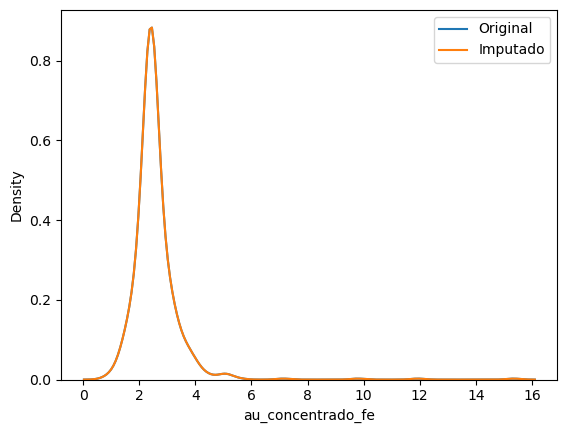

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Antes de imputar (solo datos no nulos)
sns.kdeplot(df[columnas_imputar].dropna()['au_concentrado_fe'], label='Original')

# Después de imputar
sns.kdeplot(df['au_concentrado_fe'], label='Imputado')
plt.legend()
plt.show()

## Visualizacion de datos

#### Datos sin Imputar

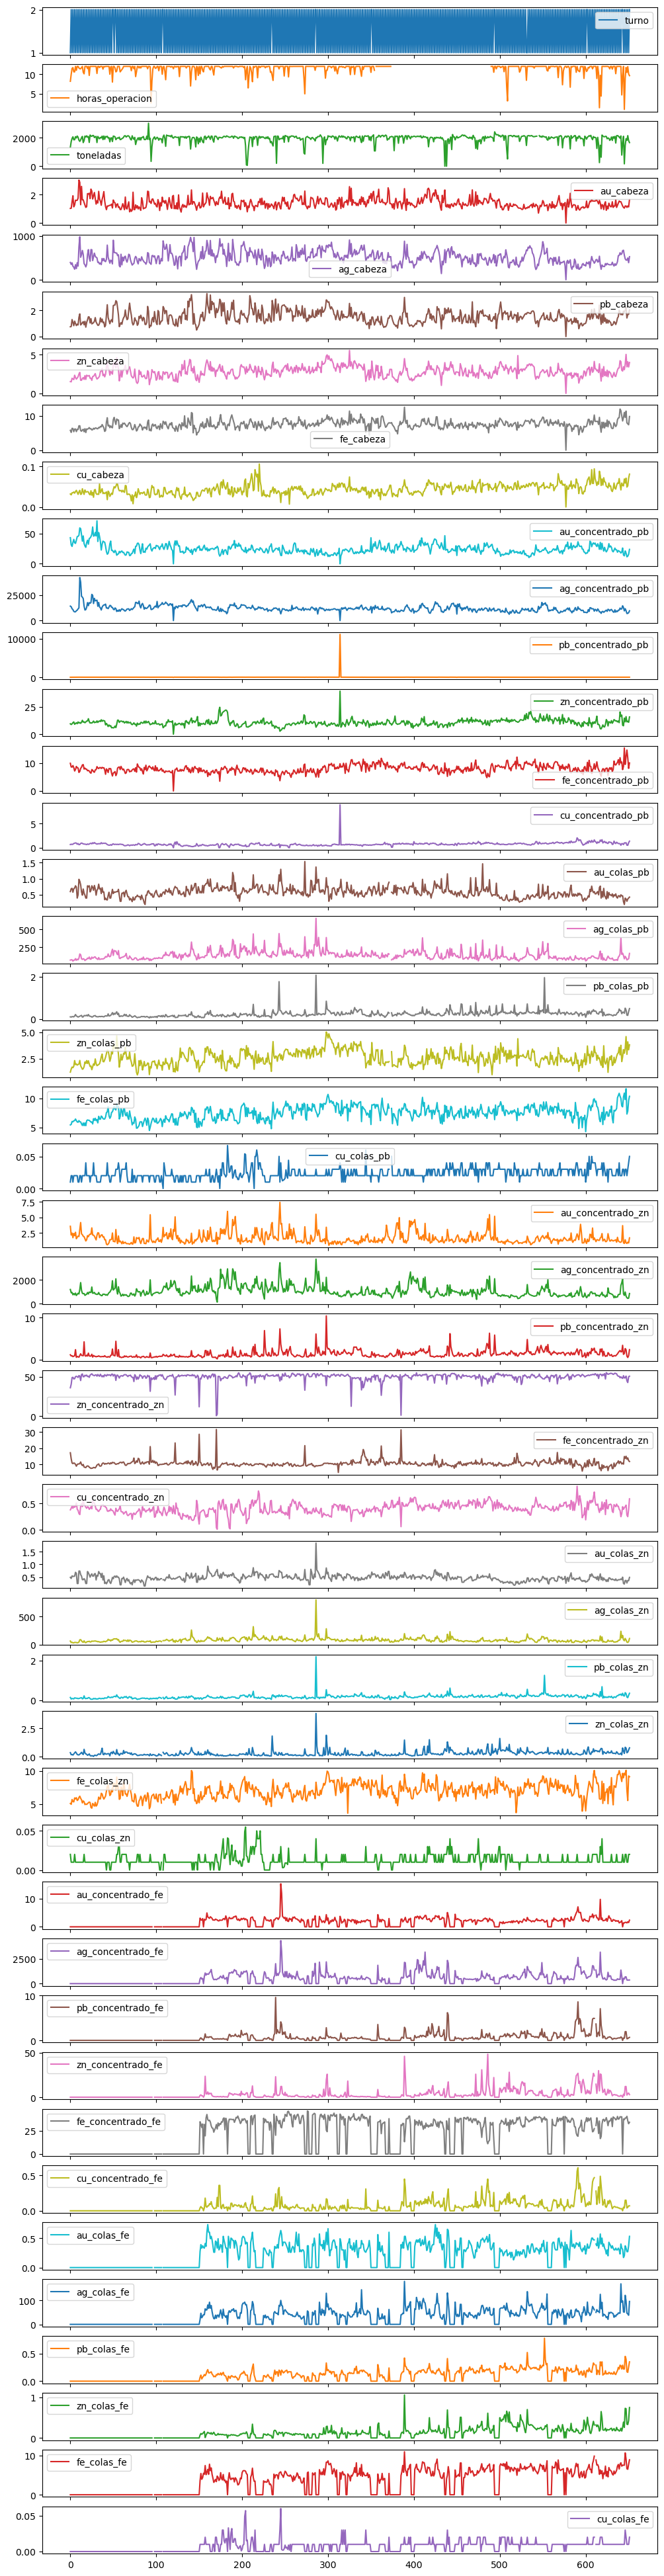

In [41]:
import seaborn as sns

# Graficamos nuestros datos
cols = df_dirty.columns

N = df_dirty.shape[0]
plots = df_dirty[cols][0:N]
plots.index = df_dirty.index[0:N]
_ = plots.plot(subplots=True, figsize =(12,50))

#### Datos Imputados

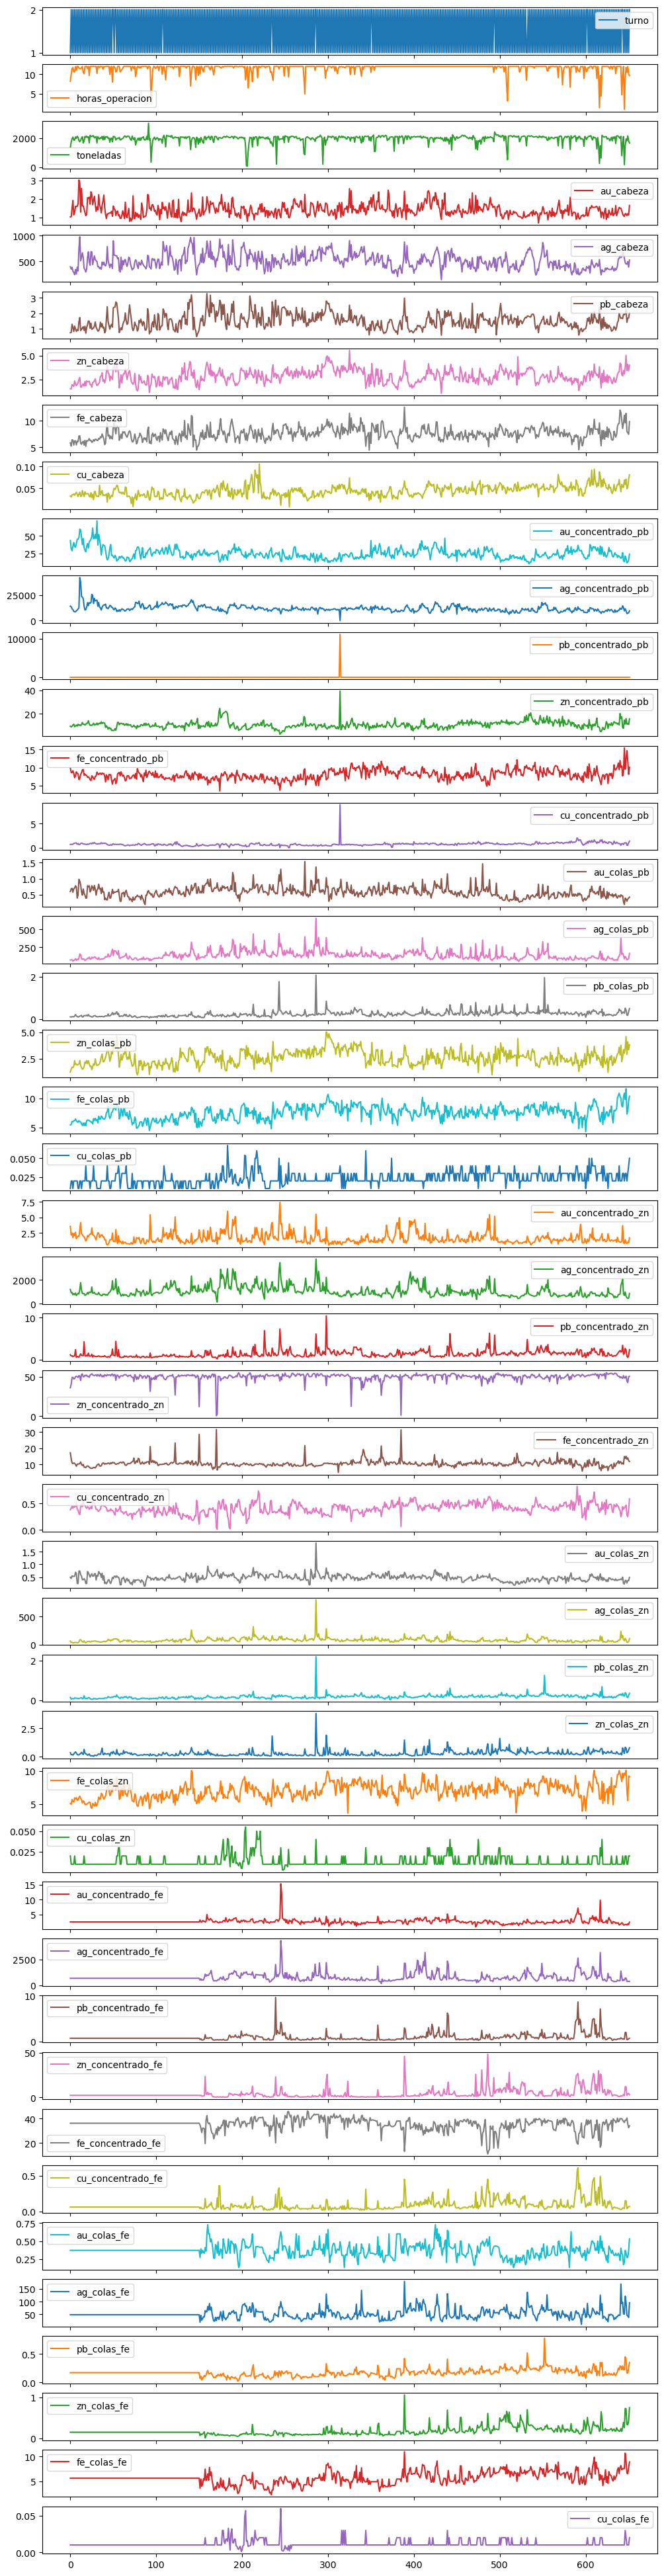

In [83]:
import seaborn as sns

# Graficamos nuestros datos
cols = df.columns

N = df.shape[0]
plots = df[cols][0:N]
plots.index = df.index[0:N]
_ = plots.plot(subplots=True, figsize =(12,50))

## Outliers

In [85]:
def tratar_outliers_con_mediana(df):
    # Aplicar el proceso de IQR a cada columna
    for col in df.columns:
        if df[col].dtype != 'object':  # Solo aplicar a columnas numéricas
            # Calcular Q1 (25% percentil) y Q3 (75% percentil)
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1  # Rango intercuartílico
            
            # Identificar los outliers (fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR])
            outlier_mask = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
            
            # Reemplazar los outliers por la mediana
            df[col] = df[col].mask(outlier_mask, df[col].median())
    
    return df

In [87]:
# Tratar outliers con mediana
df_sin_outliers = tratar_outliers_con_mediana(df)

In [89]:
# Pasamos la columnas fecha a formato datetime
# Convertir la columna 'fecha' a formato datetime
df_sin_outliers['fecha'] = pd.to_datetime(df_sin_outliers['fecha'], format='%d/%m/%Y')

# Crear un índice único combinando fecha y turno
df_sin_outliers['date_index'] = df_sin_outliers['fecha'].astype(str) + '_' + df_sin_outliers['turno'].astype(str)

# Establecer el nuevo índice único
df_sin_outliers = df_sin_outliers.set_index('date_index')

# Eliminar las columnas individuales de 'fecha' y 'turno' (ya no son necesarias)
df_sin_outliers = df_sin_outliers.drop(columns=['fecha', 'turno'])

# Ordenar el dataset de forma ascendente según el índice
df_sin_outliers.sort_index(inplace=True)
df_sin_outliers

horas_operacion    toneladas  au_cabeza  ag_cabeza  pb_cabeza  \
date_index                                                                    
2024-01-02_1            12.00  2040.052099      1.030     395.81       0.75   
2024-01-02_2            12.00  1736.900000      1.040     350.60       0.77   
2024-01-03_1            12.00  1955.000000      1.500     386.74       1.30   
2024-01-03_2            12.00  2068.400000      1.920     308.41       1.09   
2024-01-04_1            12.00  1857.100000      1.140     286.74       0.83   
...                       ...          ...        ...        ...        ...   
2024-12-29_2            12.00  1936.160000      1.199     448.90       2.23   
2024-12-30_1            12.00  1817.840000      1.100     447.02       1.42   
2024-12-30_2            11.95  2152.980000      1.200     497.17       1.69   
2024-12-31_1            12.00  1796.470000      1.134     389.98       1.70   
2024-12-31_2            12.00  2040.052099      1.650     526.56       2.04   

              zn_cabeza  fe_cabeza  cu_cabeza  au_concentrado_pb  \
date_index                                                         
2024-01-02_1       1.52      5.811      0.032             23.475   
2024-01-02_2       1.49      5.202      0.030             31.500   
2024-01-03_1       1.95      6.400      0.035             28.850   
2024-01-03_2       1.85      6.340      0.035             35.290   
2024-01-04_1       1.78      5.405      0.037             40.550   
...                 ...        ...        ...                ...   
2024-12-29_2       2.79      7.439      0.071             17.800   
2024-12-30_1       3.42      7.997      0.049             11.580   
2024-12-30_2       4.07      7.709      0.052             12.600   
2024-12-31_1       3.40      7.431      0.071             15.830   
2024-12-31_2       3.98      9.852      0.043             23.930   

              ag_concentrado_pb  pb_concentrado_pb  zn_concentrado_pb  \
date_index                                                              
2024-01-02_1           14143.96              30.37               9.46   
2024-01-02_2           13517.71              33.27               8.80   
2024-01-03_1           11565.34              37.18               9.46   
2024-01-03_2           10725.18              38.21              10.53   
2024-01-04_1            9049.98              42.39              11.16   
...                         ...                ...                ...   
2024-12-29_2            9667.45              39.38              16.01   
2024-12-30_1            6911.85              43.99              11.24   
2024-12-30_2            7064.30              32.14              11.78   
2024-12-31_1            7712.41              44.36              10.84   
2024-12-31_2            9581.78              44.30              15.72   

              fe_concentrado_pb  cu_concentrado_pb  au_colas_pb  ag_colas_pb  \
date_index                                                                     
2024-01-02_1               9.95               0.67         0.60        68.25   
2024-01-02_2               8.62               0.73         0.69        72.49   
2024-01-03_1               8.59               0.69         0.70        71.96   
2024-01-03_2               9.14               0.73         0.58        54.28   
2024-01-04_1               8.39               0.88         0.69        67.57   
...                         ...                ...          ...          ...   
2024-12-29_2               7.93               1.04         0.37       101.60   
2024-12-30_1               7.93               0.53         0.30        70.42   
2024-12-30_2               7.93               0.51         0.37        79.82   
2024-12-31_1               8.12               1.05         0.40        86.79   
2024-12-31_2              10.06               0.72         0.43       161.86   

              pb_colas_pb  zn_colas_pb  fe_colas_pb  cu_colas_pb  \
date_index                                

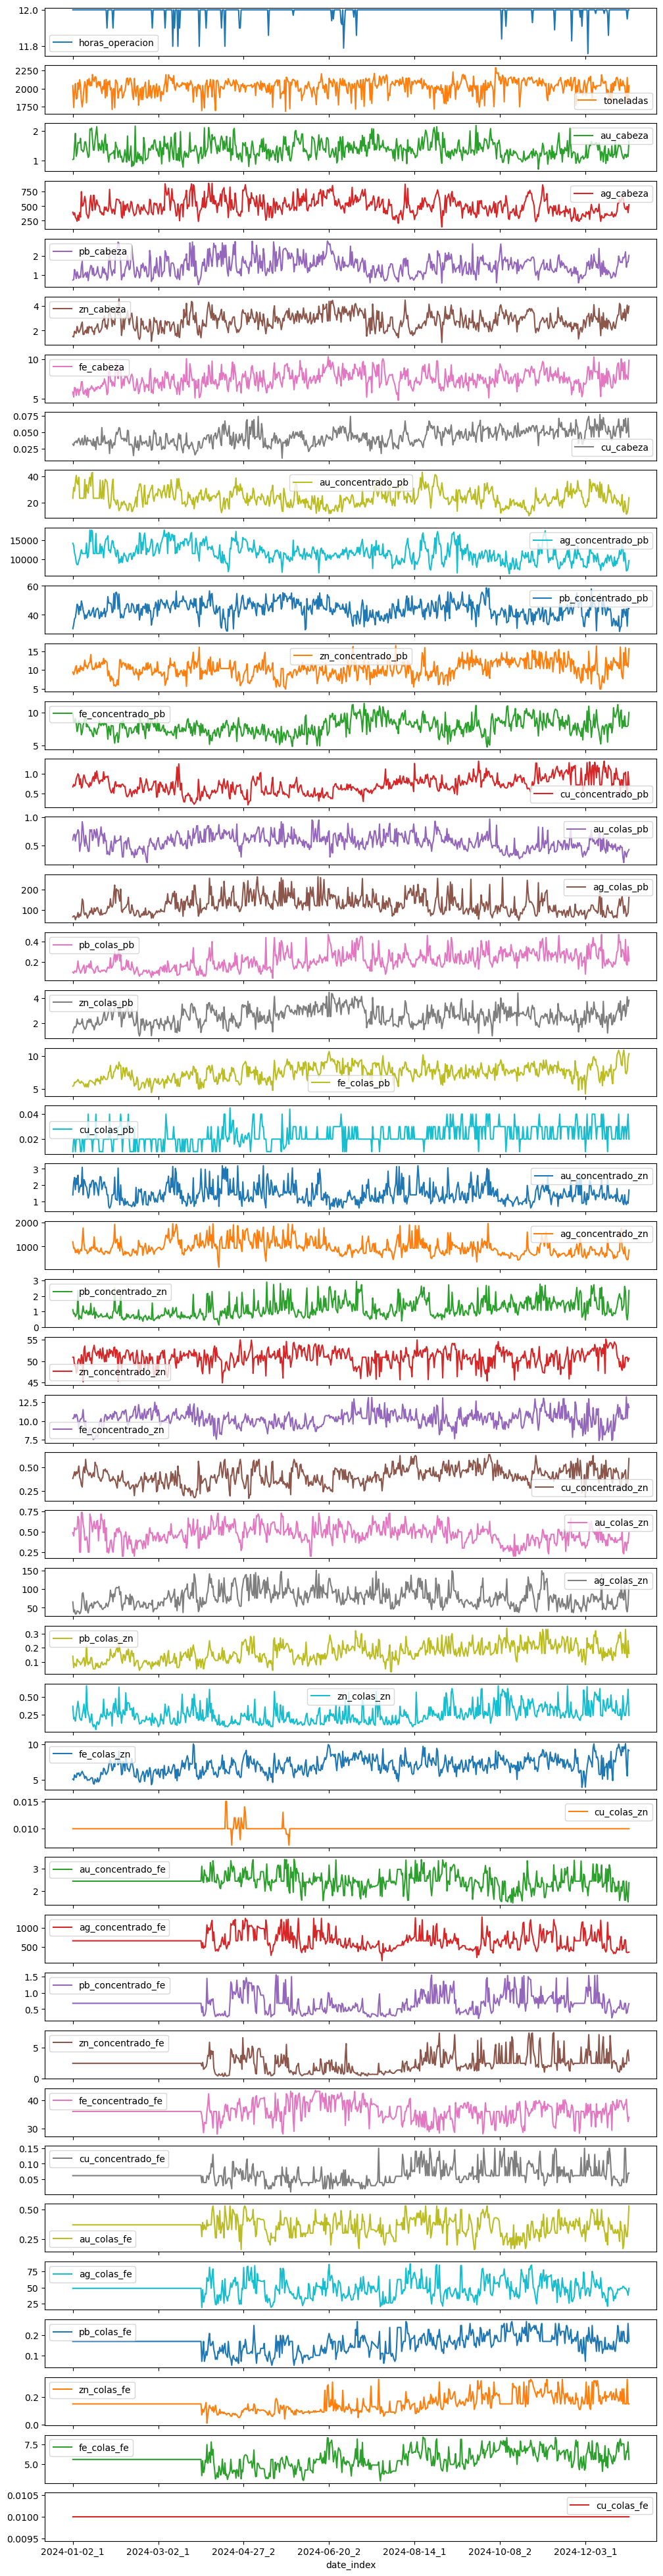

In [91]:
import seaborn as sns

# Graficamos nuestros datos
cols = df_sin_outliers.columns

N = df_sin_outliers.shape[0]
plots = df_sin_outliers[cols][0:N]
plots.index = df_sin_outliers.index[0:N]
_ = plots.plot(subplots=True, figsize =(12,50))

## Ajuste de Lagrange

In [94]:
def modificar_valores(fila, inicio, final, data_balanceada, i_data):
    for i in range(inicio, final + 1):
        fila[i] = data_balanceada[i_data]
        i_data += 1

In [96]:
def calcular_diferencia(nombre, origen1, origen2, omegas):
    """
    Calcula la diferencia entre dos listas de valores, redondea a 3 decimales,
    y la almacena en el diccionario `omegas` bajo la clave `nombre`.
    """
    omegas[nombre] = [
        origen1[i] - origen2[i]
        for i in range(len(origen1))
    ]

In [98]:
def elevar_omegas(nombre, origen, omegas):
    """
    Eleva cada elemento de la lista `origen` al cuadrado y la almacena en el diccionario `omegas` bajo la clave `nombre`.
    """
    omegas[nombre] = [
        origen[i] ** 2
        for i in range(len(origen))
    ]

In [100]:
def suma_producto_numpy(*listas):
    """
    Calcula el SUMAPRODUCTO de varias listas.
    
    Args:
        *listas: Una cantidad variable de listas (deben tener la misma longitud).
    
    Returns:
        float: La suma del producto de los elementos correspondientes.
    
    Raises:
        ValueError: Si las listas no tienen la misma longitud.
    """
    # Convertir las listas en arreglos de NumPy
    arrays = [np.array(lista) for lista in listas]
    
    # Calcular el SUMAPRODUCTO
    producto = np.prod(arrays, axis=0)  # Multiplicación elemento a elemento
    return np.sum(producto)  # Sumar los productos

In [102]:
def procesar_diccionario_y_calcular_inversa(coeficientes, posicion):
    # Inicializar matriz y fila temporal
    matriz = []
    fila = []

    # Iterar sobre las claves del diccionario
    for key in coeficientes:
        # Agregar el elemento en la posición especificada a la fila
        fila.append(coeficientes[key][posicion])

        # Si la fila alcanza 3 elementos, agregarla a la matriz y reiniciar fila
        if len(fila) == 3:
            matriz.append(fila)
            fila = []

    # Agregar los elementos restantes si hay
    if fila:
        matriz.append(fila)

    # Aplicar los cambios de signo
    for i in range(len(matriz)):
        if i == 0:  # Primera fila
            matriz[i][1] = -matriz[i][1]
        elif i == 1:  # Segunda fila
            matriz[i][0] = -matriz[i][0]
            matriz[i][2] = -matriz[i][2]
        elif i == 2:  # Última fila
            matriz[i][1] = -matriz[i][1]

    # Calcular la matriz inversa
    try:
        matriz_np = np.array(matriz)
        matriz_inversa =np.array(np.linalg.inv(matriz_np))
    except np.linalg.LinAlgError:
        # La matriz no es invertible
        matriz_inversa = None

    return matriz, matriz_inversa

In [104]:
FactPonderacion = [10,5,0.1,2.5,2,1.7]
omegas ={}
matriz = {}

    
def balancear_data(fila):
    
    # Extraer los valores de la fila
    sD = [0.01, 0.02, 1, 0.04, 0.05, 0.06]
    solidosEntrada = fila['toneladas']
    
    CircuitoPb = {
        'Alimentacion': [fila['au_cabeza'], fila['ag_cabeza'], fila['pb_cabeza'], fila['zn_cabeza'], fila['fe_cabeza'], fila['cu_cabeza']],
        'Concentrado': [fila['au_concentrado_pb'], fila['ag_concentrado_pb'], fila['pb_concentrado_pb'], fila['zn_concentrado_pb'], fila['fe_concentrado_pb'], fila['cu_concentrado_pb']],
        'Colas': [fila['au_colas_pb'], fila['ag_colas_pb'], fila['pb_colas_pb'], fila['zn_colas_pb'], fila['fe_colas_pb'], fila['cu_colas_pb']]
    }
     
    CircuitoZn = {
        'Concentrado': [fila['au_concentrado_zn'], fila['ag_concentrado_zn'], fila['pb_concentrado_zn'], fila['zn_concentrado_zn'], fila['fe_concentrado_zn'], fila['cu_concentrado_zn']],
        'Colas': [fila['au_colas_zn'], fila['ag_colas_zn'], fila['pb_colas_zn'], fila['zn_colas_zn'], fila['fe_colas_zn'], fila['cu_colas_zn']]
    }
    
    CircuitoFe = {
        'Concentrado': [fila['au_concentrado_fe'], fila['ag_concentrado_fe'], fila['pb_concentrado_fe'], fila['zn_concentrado_fe'], fila['fe_concentrado_fe'], fila['cu_concentrado_fe']],
        'Colas': [fila['au_colas_fe'], fila['ag_colas_fe'], fila['pb_colas_fe'], fila['zn_colas_fe'], fila['fe_colas_fe'], fila['cu_colas_fe']]
    }
    
    calcular_diferencia('uno_Dos', CircuitoPb['Alimentacion'], CircuitoPb['Concentrado'], omegas)
    calcular_diferencia('dos_Tres', CircuitoPb['Concentrado'], CircuitoPb['Colas'], omegas)
    calcular_diferencia('tres_Cinco', CircuitoPb['Colas'], CircuitoZn['Colas'], omegas)
    calcular_diferencia('cuatro_Cinco', CircuitoZn['Concentrado'], CircuitoZn['Colas'], omegas)
    calcular_diferencia('cinco_Siete', CircuitoZn['Colas'], CircuitoFe['Colas'], omegas)
    calcular_diferencia('seis_Siete', CircuitoFe['Concentrado'], CircuitoFe['Colas'], omegas)
    
    elevar_omegas('dos_Tres_Cuadrado', omegas['dos_Tres'], omegas)
    elevar_omegas('tres_Cinco_Cuadrado', omegas['tres_Cinco'], omegas)
    elevar_omegas('cuatro_Cinco_Cuadrado', omegas['cuatro_Cinco'], omegas)
    elevar_omegas('cinco_Siete_Cuadrado', omegas['cinco_Siete'], omegas)
    elevar_omegas('seis_Siete_Cuadrado', omegas['seis_Siete'], omegas)

    # Precalcular los productos para la matriz
    producto_1 = suma_producto_numpy(FactPonderacion, omegas['dos_Tres_Cuadrado'])
    producto_2 = suma_producto_numpy(FactPonderacion, omegas['tres_Cinco_Cuadrado'])
    producto_3 = suma_producto_numpy(FactPonderacion, omegas['cinco_Siete_Cuadrado'])
    producto_4 = suma_producto_numpy(FactPonderacion, omegas['tres_Cinco'], omegas['cuatro_Cinco'])
    producto_5 = suma_producto_numpy(FactPonderacion, omegas['cinco_Siete'], omegas['seis_Siete'])
    producto_6 = suma_producto_numpy(FactPonderacion, omegas['cuatro_Cinco_Cuadrado'])
    
    # Resolver para flujos normalizados
    Fi ={'Uno': 1}
    
    matriz = {
        'fila_1': [
            (producto_1 + producto_2 + producto_3),
            -(producto_4 + producto_3),
            -(producto_5)
        ],
        'fila_2': [
            -(producto_4 + producto_3),
            (producto_6 + producto_3),
            producto_5
        ],
        'fila_3': [
            -(producto_5),
            producto_5,
            suma_producto_numpy(FactPonderacion, omegas['seis_Siete_Cuadrado'])
        ]
    }
    
    terminosInd = np.array([[suma_producto_numpy(FactPonderacion, omegas['uno_Dos'], omegas['dos_Tres'])], [0], [0]])
    
    matriz_a_invertir = np.array([matriz['fila_1'], matriz['fila_2'], matriz['fila_3']])
    
    # Intentar calcular la matriz inversa
    try:
        matriz_inversa = np.array(np.linalg.inv(matriz_a_invertir))
        
    except np.linalg.LinAlgError:
        print("La matriz no es invertible (determinante es cero).")
    
    Fi_3_4_6 = -(np.dot(matriz_inversa, terminosInd))
    
    Fi['Dos'] = Fi['Uno'] - Fi_3_4_6[0].item()
    Fi['Tres'] = Fi_3_4_6[0].item()
    Fi['Cuatro'] = Fi_3_4_6[1].item()
    Fi['Cinco'] = Fi['Tres'] - Fi['Cuatro']
    Fi['Seis'] = Fi_3_4_6[2].item()
    Fi['Siete'] = Fi['Cinco'] - Fi['Seis']
    
    distribution_Contenidos ={}
    
    distribution_Contenidos['X1'] = [
        ((Fi['Uno'] * CircuitoPb['Alimentacion'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['X2'] = [
        ((Fi['Dos'] * CircuitoPb['Concentrado'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    print(f"Distribucion contenidos pb: {distribution_Contenidos['X2']} \n")
    distribution_Contenidos['X3'] = [
        ((Fi['Tres'] * CircuitoPb['Colas'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['X4'] = [
        ((Fi['Cuatro'] * CircuitoZn['Concentrado'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['X5'] = [
        ((Fi['Cinco'] * CircuitoZn['Colas'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['X6'] = [
        ((Fi['Seis'] * CircuitoFe['Concentrado'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['X7'] = [
        ((Fi['Siete'] * CircuitoFe['Colas'][i]) / (CircuitoPb['Alimentacion'][i] * Fi['Uno'])) * 100
        for i in range(len(CircuitoPb['Alimentacion']))    
    ]
    
    distribution_Contenidos['Error'] = [
        distribution_Contenidos['X1'][i] - distribution_Contenidos['X2'][i] - distribution_Contenidos['X4'][i] - distribution_Contenidos['X6'][i] - distribution_Contenidos['X7'][i]
        for i in range(len(distribution_Contenidos['X1']))
    ]
    
    # Errores en las leyes DELTAS
    errores_Deltas = {}
    
    errores_Deltas['Delta_1'] = [
        CircuitoPb['Alimentacion'][i] - (CircuitoPb['Concentrado'][i] * Fi['Dos'] + CircuitoPb['Colas'][i] * Fi['Tres'])
        for i in range(len(CircuitoPb['Alimentacion']))
    ]
    
    errores_Deltas['Delta_2'] = [
        CircuitoPb['Colas'][i] * Fi['Tres'] - (CircuitoZn['Concentrado'][i] * Fi['Cuatro'] + CircuitoZn['Colas'][i] * Fi['Cinco'])
        for i in range(len(CircuitoPb['Alimentacion']))
    ]
    
    errores_Deltas['Delta_3'] = [
        CircuitoZn['Colas'][i] * Fi['Cinco'] - (CircuitoFe['Concentrado'][i] * Fi['Seis'] + CircuitoFe['Colas'][i] * Fi['Siete'])
        for i in range(len(CircuitoPb['Alimentacion']))
    ]
    
    # Desviacion Estandardes              ####################################    ENTRADA          ################################
    
    ##sD = [0.01, 0.02, 1, 0.04, 0.05, 0.06]
    
    # Factores de ponderacion Wi
    factores_Ponderacion_Wi = {}
    
    factores_Ponderacion_Wi['X1'] = [
        1000000 / ((CircuitoPb['Alimentacion'][0] * (100 - CircuitoPb['Alimentacion'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoPb['Alimentacion'][1] * (100 - CircuitoPb['Alimentacion'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoPb['Alimentacion'][i] * (100 - CircuitoPb['Alimentacion'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoPb['Alimentacion']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X1'] = [
        1000000 / ((CircuitoPb['Alimentacion'][0] * (100 - CircuitoPb['Alimentacion'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoPb['Alimentacion'][1] * (100 - CircuitoPb['Alimentacion'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoPb['Alimentacion'][i] * (100 - CircuitoPb['Alimentacion'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoPb['Alimentacion']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X2'] = [
        1000000 / ((CircuitoPb['Concentrado'][0] * (100 - CircuitoPb['Concentrado'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoPb['Concentrado'][1] * (100 - CircuitoPb['Concentrado'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoPb['Concentrado'][i] * (100 - CircuitoPb['Concentrado'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoPb['Concentrado']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X3'] = [
        1000000 / ((CircuitoPb['Colas'][0] * (100 - CircuitoPb['Colas'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoPb['Colas'][1] * (100 - CircuitoPb['Colas'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoPb['Colas'][i] * (100 - CircuitoPb['Colas'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoPb['Colas']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X4'] = [
        1000000 / ((CircuitoZn['Concentrado'][0] * (100 - CircuitoZn['Concentrado'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoZn['Concentrado'][1] * (100 - CircuitoZn['Concentrado'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoZn['Concentrado'][i] * (100 - CircuitoZn['Concentrado'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoZn['Concentrado']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X5'] = [
        1000000 / ((CircuitoZn['Colas'][0] * (100 - CircuitoZn['Colas'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoZn['Colas'][1] * (100 - CircuitoZn['Colas'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoZn['Colas'][i] * (100 - CircuitoZn['Colas'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoZn['Colas']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X6'] = [
        1000000 / ((CircuitoFe['Concentrado'][0] * (100 - CircuitoFe['Concentrado'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoFe['Concentrado'][1] * (100 - CircuitoFe['Concentrado'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoFe['Concentrado'][i] * (100 - CircuitoFe['Concentrado'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoFe['Concentrado']))  # Resto de los elementos
        ]
    ]
    
    factores_Ponderacion_Wi['X7'] = [
        1000000 / ((CircuitoFe['Colas'][0] * (100 - CircuitoFe['Colas'][0])) ** 2) / sD[0],  # Primer elemento
        1000000 / ((CircuitoFe['Colas'][1] * (100 - CircuitoFe['Colas'][1])) ** 2) / sD[1],  # Segundo elemento
        *[
            100 / ((CircuitoFe['Colas'][i] * (100 - CircuitoFe['Colas'][i])) ** 2) / sD[i]
            for i in range(2, len(CircuitoFe['Colas']))  # Resto de los elementos
        ]
    ]
    
    # Coeficientes A, B, C
    
    coeficientes = {}
    
    coeficientes['A1'] = [
        (1 / factores_Ponderacion_Wi['X1'][i]) + (Fi['Dos']**2 / factores_Ponderacion_Wi['X2'][i]) + (Fi['Tres']**2 / factores_Ponderacion_Wi['X3'][i])
        for i in range(len(factores_Ponderacion_Wi['X1']))
    ]
    
    coeficientes['B1'] = [
        Fi['Tres']**2 / factores_Ponderacion_Wi['X3'][i]
        for i in range(len(factores_Ponderacion_Wi['X3']))
    ]
    
    coeficientes['C1'] = [
        0
        for i in range(len(factores_Ponderacion_Wi['X3']))
    ]
    
    coeficientes['A2'] = coeficientes['B1']
    
    coeficientes['B2'] = [
        (Fi['Tres']**2 / factores_Ponderacion_Wi['X3'][i]) + (Fi['Cuatro']**2 / factores_Ponderacion_Wi['X4'][i]) + (Fi['Cinco']**2 / factores_Ponderacion_Wi['X5'][i])
        for i in range(len(factores_Ponderacion_Wi['X3']))
    ]
    
    coeficientes['C2'] = [
        Fi['Cinco']**2 / factores_Ponderacion_Wi['X5'][i]
        for i in range(len(factores_Ponderacion_Wi['X5']))
    ]
    
    coeficientes['A3'] = [
        0
        for i in range(len(factores_Ponderacion_Wi['X3']))
    ]
    
    coeficientes['B3'] = coeficientes['C2']
    
    coeficientes['C3'] = [
        Fi['Cinco']**2 / factores_Ponderacion_Wi['X5'][i] + Fi['Seis']**2 / factores_Ponderacion_Wi['X6'][i] + Fi['Siete']**2 / factores_Ponderacion_Wi['X7'][i]
        for i in range(len(factores_Ponderacion_Wi['X3']))
    ]

    matrizA_Cu, matriz_inversaA_Cu = procesar_diccionario_y_calcular_inversa(coeficientes, 0)
    matrizA_Zn, matriz_inversaA_Zn = procesar_diccionario_y_calcular_inversa(coeficientes, 1)
    matrizA_Ag, matriz_inversaA_Ag = procesar_diccionario_y_calcular_inversa(coeficientes, 2)
    matrizA_Bi, matriz_inversaA_Bi = procesar_diccionario_y_calcular_inversa(coeficientes, 3)
    matrizA_Mo, matriz_inversaA_Mo = procesar_diccionario_y_calcular_inversa(coeficientes, 4)
    matrizA_Fe, matriz_inversaA_Fe = procesar_diccionario_y_calcular_inversa(coeficientes, 5)
    
    # terminos Independientes
    dicc_TermIndependientes ={}
    
    dicc_TermIndependientes['Cu'] = [[-2*errores_Deltas['Delta_1'][0]], [-2*errores_Deltas['Delta_2'][0]], [-2*errores_Deltas['Delta_3'][0]]]
    dicc_TermIndependientes['Zn'] = [[-2*errores_Deltas['Delta_1'][1]], [-2*errores_Deltas['Delta_2'][1]], [-2*errores_Deltas['Delta_3'][1]]]
    dicc_TermIndependientes['Ag'] = [[-2*errores_Deltas['Delta_1'][2]], [-2*errores_Deltas['Delta_2'][2]], [-2*errores_Deltas['Delta_3'][2]]]
    dicc_TermIndependientes['Bi'] = [[-2*errores_Deltas['Delta_1'][3]], [-2*errores_Deltas['Delta_2'][3]], [-2*errores_Deltas['Delta_3'][3]]]
    dicc_TermIndependientes['Mo'] = [[-2*errores_Deltas['Delta_1'][4]], [-2*errores_Deltas['Delta_2'][4]], [-2*errores_Deltas['Delta_3'][4]]]
    dicc_TermIndependientes['Fe'] = [[-2*errores_Deltas['Delta_1'][5]], [-2*errores_Deltas['Delta_2'][5]], [-2*errores_Deltas['Delta_3'][5]]]
    
    dicc_Soluciones = {}
    
    dicc_Soluciones['Cu'] = np.dot(matriz_inversaA_Cu, dicc_TermIndependientes['Cu'])
    dicc_Soluciones['Zn'] = np.dot(matriz_inversaA_Zn, dicc_TermIndependientes['Zn'])
    dicc_Soluciones['Ag'] = np.dot(matriz_inversaA_Ag, dicc_TermIndependientes['Ag'])
    dicc_Soluciones['Bi'] = np.dot(matriz_inversaA_Bi, dicc_TermIndependientes['Bi'])
    dicc_Soluciones['Mo'] = np.dot(matriz_inversaA_Mo, dicc_TermIndependientes['Mo'])
    dicc_Soluciones['Fe'] = np.dot(matriz_inversaA_Fe, dicc_TermIndependientes['Fe'])
    
    lambdas = {}
    
    lambdas['lambda_1'] = [
        dicc_Soluciones[key][0].item()
        for key in dicc_Soluciones
    ]
    
    lambdas['lambda_2'] = [
        dicc_Soluciones[key][1].item()
        for key in dicc_Soluciones
    ]
    
    lambdas['lambda_3'] = [
        dicc_Soluciones[key][2].item()
        for key in dicc_Soluciones
    ]
    
    # Factores de Correccion de leyes
    
    factores_Correccion = {}
    
    factores_Correccion['X1'] = [
        (-1 / 2) * (lambdas['lambda_1'][i] / factores_Ponderacion_Wi['X1'][i])
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X2'] = [
        (1 / 2) * (lambdas['lambda_1'][i]) * (Fi['Dos'] / factores_Ponderacion_Wi['X2'][i])
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X3'] = [
        (1 / 2) * (lambdas['lambda_1'][i] - lambdas['lambda_2'][i]) * ( Fi['Tres'] / factores_Ponderacion_Wi['X3'][i])
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X4'] = [
        (0.5) * (lambdas['lambda_2'][i]) * ( Fi['Cuatro'] / factores_Ponderacion_Wi['X4'][i])
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X5'] = [
        (0.5) * ((lambdas['lambda_2'][i] - lambdas['lambda_3'][i]) / factores_Ponderacion_Wi['X5'][i]) * Fi['Cinco']
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X6'] = [
        (0.5) * (lambdas['lambda_3'][i] / factores_Ponderacion_Wi['X6'][i]) * Fi['Seis']
        for i in range(len(lambdas['lambda_1']))
    ]
    
    factores_Correccion['X7'] = [
        (0.5) * (lambdas['lambda_3'][i]) * ( Fi['Siete'] / factores_Ponderacion_Wi['X7'][i])
        for i in range(len(lambdas['lambda_1']))
    ]
    
    leyes_Corregidas = {}
    
    leyes_Corregidas['X1'] = [
        CircuitoPb['Alimentacion'][i] - factores_Correccion['X1'][i]
        for i in range(len(CircuitoPb['Alimentacion']))
    ]
    
    leyes_Corregidas['X2'] = [
        CircuitoPb['Concentrado'][i] - factores_Correccion['X2'][i]
        for i in range(len(CircuitoPb['Concentrado']))
    ]
    
    leyes_Corregidas['X3'] = [
        CircuitoPb['Colas'][i] - factores_Correccion['X3'][i]
        for i in range(len(CircuitoPb['Colas']))
    ]
    
    leyes_Corregidas['X4'] = [
        CircuitoZn['Concentrado'][i] - factores_Correccion['X4'][i]
        for i in range(len(CircuitoZn['Concentrado']))
    ]
    
    leyes_Corregidas['X5'] = [
        CircuitoZn['Colas'][i] - factores_Correccion['X5'][i]
        for i in range(len(CircuitoZn['Colas']))
    ]
    
    leyes_Corregidas['X6'] = [
        CircuitoFe['Concentrado'][i] - factores_Correccion['X6'][i]
        for i in range(len(CircuitoFe['Concentrado']))
    ]
    
    leyes_Corregidas['X7'] = [
        CircuitoFe['Colas'][i] - factores_Correccion['X7'][i]
        for i in range(len(CircuitoFe['Colas']))
    ]
    
    dContenidos_Corregidos = {}
    
    dContenidos_Corregidos['X1'] = [
        (leyes_Corregidas['X1'][i] * Fi['Uno']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X2'] = [
        (leyes_Corregidas['X2'][i] * Fi['Dos']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X3'] = [
        (leyes_Corregidas['X3'][i] * Fi['Tres']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X4'] = [
        (leyes_Corregidas['X4'][i] * Fi['Cuatro']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X5'] = [
        (leyes_Corregidas['X5'][i] * Fi['Cinco']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X6'] = [
        (leyes_Corregidas['X6'][i] * Fi['Seis']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['X7'] = [
        (leyes_Corregidas['X7'][i] * Fi['Siete']) / (leyes_Corregidas['X1'][i] * Fi['Uno']) * 100
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    dContenidos_Corregidos['Error'] = [
        round(dContenidos_Corregidos['X1'][i] - dContenidos_Corregidos['X2'][i] - dContenidos_Corregidos['X4'][i] - dContenidos_Corregidos['X6'][i] - dContenidos_Corregidos['X7'][i], 6)
        for i in range(len(leyes_Corregidas['X1']))
    ]
    
    solidos_Corregido = {}
    
    solidos_Corregido['X1'] = round(solidosEntrada * Fi['Uno'], 2)
    solidos_Corregido['X2'] = round(solidosEntrada * Fi['Dos'], 2)
    solidos_Corregido['X3'] = round(solidosEntrada * Fi['Tres'], 2)
    solidos_Corregido['X4'] = round(solidosEntrada * Fi['Cuatro'], 2)
    solidos_Corregido['X5'] = round(solidosEntrada * Fi['Cinco'], 2)
    solidos_Corregido['X6'] = round(solidosEntrada * Fi['Seis'], 2)
    solidos_Corregido['X7'] = round(solidosEntrada * Fi['Siete'], 2)
    
    #print(dContenidos_Corregidos)
    
    ################ BALANCE ##################
    
    insoluble = [12, 15, 16]
    cabeza_Calculada = round(solidos_Corregido['X2'] + solidos_Corregido['X4'] + solidos_Corregido['X6'] + solidos_Corregido['X7'], 4)
    # Lista de claves que deseas usar
    claves_deseadas = ['X1', 'X2', 'X4', 'X6', 'X7']
    
    distribucion = {}
    
    distribucion['Cabezas'] = dContenidos_Corregidos['X1']
    distribucion['Conc_Pb'] = dContenidos_Corregidos['X2']
    distribucion['Conc_Zn'] = dContenidos_Corregidos['X4']
    distribucion['Conc_Fe'] = dContenidos_Corregidos['X6']
    distribucion['Colas_Finales'] = dContenidos_Corregidos['X7']
    distribucion['Cabeza_Calculada'] = [
        round(distribucion['Conc_Pb'][i] + distribucion['Conc_Zn'][i] + distribucion['Conc_Fe'][i] + distribucion['Colas_Finales'][i], 2)
        for i in range(len(distribucion['Cabezas']))
    ]
    
    tsm = [
        solidosEntrada, solidos_Corregido['X2'], solidos_Corregido['X4'], solidos_Corregido['X6'], solidos_Corregido['X7'], cabeza_Calculada
    ]
    
    ensayes = {}
    
    ensayes['Cabezas'] = leyes_Corregidas['X1']
    ensayes['Conc_Pb'] = leyes_Corregidas['X2']
    ensayes['Colas_Pb'] = leyes_Corregidas['X3']
    ensayes['Conc_Zn'] = leyes_Corregidas['X4']
    ensayes['Colas_Zn'] = leyes_Corregidas['X5']
    ensayes['Conc_Fe'] = leyes_Corregidas['X6']
    ensayes['Colas_Finales'] = leyes_Corregidas['X7']
    
    
    contenidos = {}
    
    contenidos['Cabezas'] = [
        (tsm[0] * ensayes['Cabezas'][0]) / 1000,
        (tsm[0] * ensayes['Cabezas'][1]) / 1000,
        *[
            (tsm[0] * ensayes['Cabezas'][i]) / 100
            for i in range(2, len(ensayes['Cabezas']))
        ]
    ]
    
    contenidos['Conc_Pb'] = [
        (contenidos['Cabezas'][i] * distribucion['Conc_Pb'][i]) / 100
        for i in range(len(contenidos['Cabezas']))
    ]
    
    contenidos['Conc_Zn'] = [
        (contenidos['Cabezas'][i] * distribucion['Conc_Zn'][i]) / 100
        for i in range(len(contenidos['Cabezas']))
    ]
    
    contenidos['Conc_Fe'] = [
        (contenidos['Cabezas'][i] * distribucion['Conc_Fe'][i]) / 100
        for i in range(len(contenidos['Cabezas']))
    ]
    
    contenidos['Colas_Finales'] = [
        (contenidos['Cabezas'][i] * distribucion['Colas_Finales'][i]) / 100
        for i in range(len(contenidos['Cabezas']))
    ]
    
    contenidos['Cabeza_Calculada'] = [
        contenidos['Conc_Pb'][i] + contenidos['Conc_Zn'][i] + contenidos['Conc_Fe'][i] + contenidos['Colas_Finales'][i]
        for i in range(len(contenidos['Cabezas']))
    ]
    
    insoluble_Contenidos = [
        (tsm[i] * insoluble[i]) / 100
        for i in range(len(insoluble))
    ]
    
    ensayes['Cabeza_Calculada'] = [
        (contenidos['Cabeza_Calculada'][0] * 1000) / tsm[5],
        (contenidos['Cabeza_Calculada'][1] * 1000) / tsm[5],
        *[
            (contenidos['Cabeza_Calculada'][i] * 100) / tsm[5]
            for i in range(2, len(contenidos['Cabeza_Calculada']))
        ]
    ]

    #Agregar Variables objetivo
    # Recuperaciones
    au_recuperacion = distribucion['Conc_Pb'][0] + distribucion['Conc_Zn'][0] + distribucion['Conc_Fe'][0]
    ag_recuperacion = distribucion['Conc_Pb'][1] + distribucion['Conc_Zn'][1] + distribucion['Conc_Fe'][1]
    pb_recuperacion = distribucion['Conc_Pb'][2]
    zn_recuperacion = distribucion['Conc_Zn'][3]
    fe_recuperacion = distribucion['Conc_Fe'][4]
    
    #Contenidos
    #Contenido Au
    au_contenido = contenidos['Conc_Pb'][0] + contenidos['Conc_Zn'][0] + contenidos['Conc_Fe'][0]
    ag_contenido = contenidos['Conc_Pb'][1] + contenidos['Conc_Zn'][1] + contenidos['Conc_Fe'][1]
    pb_contenido = contenidos['Conc_Pb'][2]
    zn_contenido = contenidos['Conc_Zn'][3]
    
    # Leyes 
    # Ley Concentrado Pb
    ag_concentrado_pb_ley = ensayes['Conc_Pb'][1]
    pb_concentrado_pb_ley = ensayes['Conc_Pb'][2]
    zn_concentrado_pb_ley = ensayes['Conc_Pb'][3]

    # Ley Concentrado Zn
    ag_concentrado_zn_ley = ensayes['Conc_Zn'][1]
    zn_concentrado_zn_ley = ensayes['Conc_Zn'][3]

    # Ley Concentrado Fe
    au_concentrado_fe_ley = ensayes['Conc_Fe'][0]
    ag_concentrado_fe_ley = ensayes['Conc_Fe'][1]
    fe_concentrado_fe_ley = ensayes['Conc_Fe'][4]

    # Cambiar valoes cabeza anteriores por los datos ajustados
    modificar_valores(fila, 2, 7,  ensayes['Cabezas'], 0)
    # Cambiar valoes concentrado pb anteriores por los datos ajustados
    modificar_valores(fila, 8, 13,  ensayes['Conc_Pb'], 0)
    # Cambiar valoes colas pb anteriores por los datos ajustados
    modificar_valores(fila, 14, 19,  ensayes['Colas_Pb'], 0)
    # Cambiar valoes concentrado zn anteriores por los datos ajustados
    modificar_valores(fila, 20, 25,  ensayes['Conc_Zn'], 0)
    # Cambiar valoes colas zn anteriores por los datos ajustados
    modificar_valores(fila, 20, 25,  ensayes['Colas_Zn'], 0)
    # Cambiar valoes concentrado fe anteriores por los datos ajustados
    modificar_valores(fila, 26, 31,  ensayes['Conc_Fe'], 0)
    # Cambiar valoes concentrado fe anteriores por los datos ajustados
    modificar_valores(fila, 32, 37,  ensayes['Colas_Finales'], 0)
    
        # Retornar los resultados ajustados
    return {
        'leyes_Corregidas': leyes_Corregidas,
        'dContenidos_Corregidos': dContenidos_Corregidos,
        'solidos_Corregido': solidos_Corregido,
        'distribucion': distribucion,
        'tsm': tsm,
        'ensayes': ensayes,
        'contenidos': contenidos,
        'recuperaciones': {
            'au_recuperacion': au_recuperacion,
            'ag_recuperacion': ag_recuperacion,
            'pb_recuperacion': pb_recuperacion,
            'zn_recuperacion': zn_recuperacion,
            'fe_recuperacion': fe_recuperacion
        },
        'contenidos_objetivo': {
            'au_contenido': au_contenido,
            'ag_contenido': ag_contenido,
            'pb_contenido': pb_contenido,
            'zn_contenido': zn_contenido
        },
        'leyes_concentrados': {
            'ag_concentrado_pb_ley': ag_concentrado_pb_ley,
            'pb_concentrado_pb_ley': pb_concentrado_pb_ley,
            'zn_concentrado_pb_ley': zn_concentrado_pb_ley,
            'ag_concentrado_zn_ley': ag_concentrado_zn_ley,  # Corregido para Zn
            'zn_concentrado_zn_ley': zn_concentrado_zn_ley,  # Corregido para Zn
            'au_concentrado_fe_ley': au_concentrado_fe_ley,  # Corregido para Fe
            'ag_concentrado_fe_ley': ag_concentrado_fe_ley,  # Corregido para Fe
            'fe_concentrado_fe_ley': fe_concentrado_fe_ley   # Corregido para Fe
        }
    }

In [106]:
# Lista para almacenar los resultados de cada fila
resultados = []

# Iterar sobre cada fila del DataFrame
for index, fila in df_sin_outliers.iterrows():
    # Aplicar la función balancear_data a la fila actual
    resultado = balancear_data(fila)
    
    # Calcular las variables objetivo
    variables_objetivo = {
        'au_recuperacion': resultado['distribucion']['Conc_Pb'][0] + resultado['distribucion']['Conc_Zn'][0] + resultado['distribucion']['Conc_Fe'][0],
        'ag_recuperacion': resultado['distribucion']['Conc_Pb'][1] + resultado['distribucion']['Conc_Zn'][1] + resultado['distribucion']['Conc_Fe'][1],
        'pb_recuperacion': resultado['distribucion']['Conc_Pb'][2],
        'zn_recuperacion': resultado['distribucion']['Conc_Zn'][3],
        'fe_recuperacion': resultado['distribucion']['Conc_Fe'][4],
        'au_contenido': resultado['contenidos']['Conc_Pb'][0] + resultado['contenidos']['Conc_Zn'][0] + resultado['contenidos']['Conc_Fe'][0],
        'ag_contenido': resultado['contenidos']['Conc_Pb'][1] + resultado['contenidos']['Conc_Zn'][1] + resultado['contenidos']['Conc_Fe'][1],
        'pb_contenido': resultado['contenidos']['Conc_Pb'][2],
        'zn_contenido': resultado['contenidos']['Conc_Zn'][3],
        'ag_concentrado_pb_ley': resultado['ensayes']['Conc_Pb'][1],
        'pb_concentrado_pb_ley': resultado['ensayes']['Conc_Pb'][2],
        'zn_concentrado_pb_ley': resultado['ensayes']['Conc_Pb'][3],
        'ag_concentrado_zn_ley': resultado['ensayes']['Conc_Zn'][1],
        'zn_concentrado_zn_ley': resultado['ensayes']['Conc_Zn'][3],
        'au_concentrado_fe_ley': resultado['ensayes']['Conc_Fe'][0],
        'ag_concentrado_fe_ley': resultado['ensayes']['Conc_Fe'][1],
        'fe_concentrado_fe_ley': resultado['ensayes']['Conc_Fe'][4]
    }
    
    # Agregar las variables objetivo a la fila actual
    fila = pd.concat([fila, pd.Series(variables_objetivo)])
    
    # Agregar la fila actualizada a la lista de resultados
    resultados.append(fila)

# Convertir la lista de resultados en un DataFrame
df_resultado = pd.DataFrame(resultados)

df_resultado.index = df_sin_outliers.index

# Guardar el DataFrame con los resultados en un archivo CSV
df_resultado.to_csv('data_variables_objetivo.csv', index=True)

Distribucion contenidos pb: [53.038185848825705, 83.1580968786384, 94.23317261516232, 14.483310220105036, 3.984671190580607, 48.72424394871488] 

Distribucion contenidos pb: [62.650385570762715, 79.75129558173334, 89.37346778218293, 12.216391365582622, 3.427547259386033, 50.332457910394766] 

Distribucion contenidos pb: [52.67617061046338, 81.90283769274005, 78.32955699094902, 13.286670416610683, 3.6759773522303973, 53.99340092283197] 

Distribucion contenidos pb: [43.773484654442456, 82.82030572281455, 83.48553426005736, 13.555555947242626, 3.433346447612883, 49.67244147809298] 

Distribucion contenidos pb: [86.78899452604114, 77.00838016370352, 124.61317857986207, 15.2975838395947, 3.7874325938957876, 58.03093898658611] 

Distribucion contenidos pb: [55.93231388378611, 72.21404481383696, 81.70884224873714, 7.852451087731518, 2.367274126284142, 55.72096014451979] 

Distribucion contenidos pb: [63.232202974088345, 74.99761801169804, 139.18400776957597, 14.346619379208466, 3.74574794213

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba

Distribucion contenidos pb: [47.58757134174167, 70.11419946186169, 76.0377834716014, 5.702191148057296, 2.179738270953079, 37.25713400723257] 

Distribucion contenidos pb: [66.37818172160955, 72.09062838356267, 77.35398032260854, 5.999007768733695, 2.479185749981449, 46.91452016723001] 

Distribucion contenidos pb: [32.673452164775114, 58.8255520644016, 82.94998626660114, 4.257581561648795, 1.879021380897369, 29.34873348434325] 

Distribucion contenidos pb: [23.50861406458268, 39.73201341316069, 44.22574440973649, 2.726874256122483, 0.9153534300459506, 26.27878821081733] 

Distribucion contenidos pb: [41.132382986558156, 74.14160924257894, 77.73045472822766, 5.066879461845007, 2.4053189013503755, 61.7385902327659] 

Distribucion contenidos pb: [51.12600214130628, 68.76504279526554, 93.75863526434513, 6.128408398028261, 2.780746817847006, 55.01135817055949] 

Distribucion contenidos pb: [54.60464091313192, 69.64014496272563, 77.26023346289088, 7.144004930252899, 2.8878624679327647, 51.9

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba

Distribucion contenidos pb: [43.58218894872936, 78.12150356828155, 85.9562260167395, 9.944592196859729, 2.779154452425982, 56.48328630931723] 

Distribucion contenidos pb: [47.539997382382936, 82.7231998725381, 128.28501486627678, 12.530268800197897, 3.979411874953107, 47.88208206749465] 

Distribucion contenidos pb: [55.0825004478657, 86.52721404363093, 147.85529168161383, 13.081866830503659, 4.654833487470538, 66.28245697190532] 

Distribucion contenidos pb: [61.14292002664696, 86.21184031732135, 127.14814356314254, 15.509219006030245, 4.721228225595587, 68.70393373141472] 

Distribucion contenidos pb: [61.36634657046862, 83.91616505936871, 155.31297118510238, 12.656190541957876, 3.923866013266414, 59.6518203146529] 

Distribucion contenidos pb: [67.65895011987122, 82.8405853325032, 82.85020657894408, 11.42682982570335, 3.30139560155449, 42.76523727323555] 

Distribucion contenidos pb: [49.256357160630934, 81.62673273022418, 75.59203747710441, 13.80661019033732, 3.2793898381214692, 3

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba

Distribucion contenidos pb: [65.37168752976807, 76.61565536332131, 137.4385464074261, 19.0082882662332, 4.467200539028078, 47.42233408035405] 

Distribucion contenidos pb: [40.42068461484934, 63.803271125443786, 124.59853926853013, 7.571256967542089, 2.3570669168475633, 22.344214823023403] 

Distribucion contenidos pb: [50.88769027038652, 80.59666146084199, 105.21440711012954, 18.3048725612213, 3.6102856119650717, 37.203605491795194] 

Distribucion contenidos pb: [60.607351217024764, 80.3591682617984, 109.3453305666416, 10.069229396693665, 2.8470151893309823, 58.527273834766845] 

Distribucion contenidos pb: [81.41553019505332, 83.70775272475376, 99.52066669310456, 12.454676539602834, 3.826899594298864, 45.82838013405411] 

Distribucion contenidos pb: [43.945012180747696, 78.36201685945099, 78.91545464383523, 9.506228647744607, 2.5149482091384914, 35.12023361527868] 

Distribucion contenidos pb: [55.059220739334094, 85.69187827967076, 120.1246330731867, 17.486458831103118, 4.0852788995

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba

Distribucion contenidos pb: [67.56065710174894, 73.96173537207564, 118.28674204167456, 6.544898903944612, 3.00841794899186, 28.637367516255775] 

Distribucion contenidos pb: [69.98975765136983, 70.08895279690167, 62.732324230888295, 4.193232077099227, 1.8026688441052854, 25.3392796375005] 

Distribucion contenidos pb: [62.84650099599809, 77.21580172940814, 103.35826743183372, 7.324040532635531, 3.0828100823860396, 43.957562054755975] 

Distribucion contenidos pb: [53.55805585476365, 70.6819152876413, 103.1934703668608, 9.083813370849604, 3.2532916869418136, 50.97411456352505] 

Distribucion contenidos pb: [59.03226263572141, 73.23604024026712, 103.98114856425448, 10.494691774596584, 4.095739516730543, 34.45809553697046] 

Distribucion contenidos pb: [63.06134218387748, 86.7550943573793, 127.30016564577345, 14.26941277440783, 4.901321730292805, 50.3674846787528] 

Distribucion contenidos pb: [73.27345768587654, 84.52578520282485, 122.19912777748847, 13.762887972363533, 4.533610119292176

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba

Distribucion contenidos pb: [51.79983272086297, 67.41108688702572, 126.21669372217232, 15.866432170537252, 3.1716020793915396, 204.73799973904798] 

Distribucion contenidos pb: [34.11496936318647, 57.827340263087834, 84.8339416929974, 12.1208871139091, 2.8790240527156117, 48.74994157901901] 

Distribucion contenidos pb: [56.46041278137244, 71.47521672575604, 70.08863978870188, 6.649840987201163, 3.115478990894648, 52.60846584778961] 

Distribucion contenidos pb: [79.17658249089368, 79.93344458339587, 104.92188044765246, 7.803295349272579, 3.2885469112165624, 63.75292300355696] 

Distribucion contenidos pb: [44.11443524020519, 66.29290543302578, 75.36707393927054, 5.0819133868041035, 2.2139717772938647, 44.94026054074016] 

Distribucion contenidos pb: [50.159478453335105, 73.22469405227989, 80.5573541185636, 6.883447154739023, 2.5352956616711277, 57.86292709622265] 

Distribucion contenidos pb: [38.81135454567934, 68.07238503643013, 71.72996105798627, 8.061559463122581, 2.57694717451000

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba

Distribucion contenidos pb: [55.00313604852821, 77.9503976857254, 100.55484853067225, 9.232907873151852, 4.332874916735737, 37.641699601138626] 

Distribucion contenidos pb: [54.92501611596966, 79.23890002046419, 107.63221122684455, 6.238524402357625, 2.495699168429557, 43.84722650378706] 

Distribucion contenidos pb: [53.760325653795796, 74.43875259112578, 87.92219721641176, 9.854467481544505, 3.9467598416184586, 56.09466104879181] 

Distribucion contenidos pb: [50.38844520564425, 63.895469771393586, 95.73416473847452, 14.862299148497971, 3.35894309225129, 58.262239174779] 

Distribucion contenidos pb: [57.639196335443586, 74.3253107281189, 93.66001938723585, 9.837738485146048, 3.4086994144711653, 49.52759089716735] 

Distribucion contenidos pb: [50.17028444400001, 75.8866622912978, 123.65308371042491, 9.267530934843663, 3.346934845206393, 52.82831275891393] 

Distribucion contenidos pb: [49.85156886215991, 76.58734917577286, 53.40659027813235, 12.311040534093925, 3.7575250932658193, 

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba

Distribucion contenidos pb: [17.128553975207122, 33.22635433810305, 61.456157909226064, 4.957504013383651, 1.126790480761767, 27.087713204224222] 

Distribucion contenidos pb: [51.394986016453004, 69.17126550166405, 96.242985907501, 11.493191463512579, 3.377897990753262, 51.35020126042612] 

Distribucion contenidos pb: [50.82604247853526, 64.8855213679231, 87.89588400411733, 10.067712601002526, 3.1120204555314768, 57.46805905293289] 

Distribucion contenidos pb: [68.4430925727186, 69.6606908131609, 87.46430550629731, 11.466311603030038, 3.576888596642564, 54.2029653487441] 

Distribucion contenidos pb: [59.30590925302091, 62.91680613794971, 69.92385326754045, 9.488467589648815, 2.715053519092949, 42.71993696511689] 

Distribucion contenidos pb: [51.794514203262885, 60.50626694258311, 67.52921866530677, 7.663044283040888, 2.0299981349088645, 39.841934002509916] 

Distribucion contenidos pb: [70.31295756640026, 74.53996563793477, 80.00676071047657, 13.179625719541816, 3.649959484843527, 

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba

Distribucion contenidos pb: [41.433372291184476, 54.29000525899143, 62.906376171556225, 4.259992763370681, 1.587281227154275, 25.623738613569547] 

Distribucion contenidos pb: [65.8909853098881, 82.00466326017418, 103.42858123332246, 9.425776397581428, 2.8318942562636504, 43.13573599031225] 

Distribucion contenidos pb: [59.55386515095293, 71.20872337081899, 89.61047856752714, 9.612933162426492, 3.2713447199176495, 47.94223495499132] 

Distribucion contenidos pb: [56.8153985935363, 79.22698051120108, 118.35772347272504, 7.3987465941211745, 2.524709640409303, 60.327870567379705] 

Distribucion contenidos pb: [55.36286149114542, 76.39023463806001, 93.95185081051368, 7.392177537321618, 3.188810984055486, 45.15916095125373] 

Distribucion contenidos pb: [52.43792585239881, 74.95969804445906, 113.69140530450497, 12.050253024471562, 3.2951943931321908, 43.933214151719234] 

Distribucion contenidos pb: [46.29728036888533, 74.06772084100392, 118.61594727094489, 12.48891005391948, 3.52852066266

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba

Distribucion contenidos pb: [22.255989410406272, 34.15100050100263, 44.297328142119866, 4.850771875260366, 1.323087539401239, 20.004044424607795] 

Distribucion contenidos pb: [67.42949723433121, 77.60675427054207, 104.0082184877364, 16.878914001949415, 4.903874728487414, 59.25430443054481] 

Distribucion contenidos pb: [67.94961724212175, 79.82054350828153, 101.8220551938267, 20.908701033934427, 5.658411644957194, 63.50647933086907] 

Distribucion contenidos pb: [61.54206580648606, 79.2263093097327, 111.93368627413658, 20.371317846559545, 5.477908898595716, 64.9615143555257] 

Distribucion contenidos pb: [70.79671062321769, 83.38687196982889, 112.78295796808816, 15.296643791555386, 4.996923519915642, 79.20383295491193] 

Distribucion contenidos pb: [59.85303858081308, 82.26236575300825, 98.05497278524082, 23.248114905318694, 6.804617897452513, 81.3762509582526] 

Distribucion contenidos pb: [62.22598013906138, 82.99453508092608, 92.18357593025884, 16.86174906902506, 6.412803077980217,

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba

Distribucion contenidos pb: [64.6837515738453, 78.13255798152292, 91.21145209734979, 18.236448602259244, 3.9069994957028142, 63.46306288930316] 

Distribucion contenidos pb: [60.6246219282357, 76.2591060250704, 86.71343139645053, 16.655853314125608, 3.7916747579945604, 65.37450503766847] 

Distribucion contenidos pb: [54.47091424043084, 77.44664722156178, 87.65329964097594, 14.603812505264994, 3.7966116410454624, 63.803822549740644] 

Distribucion contenidos pb: [63.96357301592628, 82.10709751276875, 73.26187530950243, 13.424700710198012, 4.102656644782535, 67.02447394685765] 

Distribucion contenidos pb: [63.19710571186088, 79.18717916665825, 87.10063594171378, 14.170168319263238, 4.4542346458753, 104.86146485280943] 

Distribucion contenidos pb: [61.54757101593267, 82.39216234822626, 100.74697568933051, 29.518990922340404, 6.922813513476809, 86.77556410944501] 

Distribucion contenidos pb: [42.10907231341078, 74.98740533287786, 98.7185642002934, 10.329148290864246, 3.6242625581979806

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba

Distribucion contenidos pb: [58.787358538682035, 80.63961222438624, 101.92802162317214, 15.99123357395498, 3.120645087696848, 59.96272205964173] 

Distribucion contenidos pb: [56.85228288360163, 74.15743685034548, 98.36399788825265, 12.3149838366113, 2.8686264870973517, 56.79137894006767] 

Distribucion contenidos pb: [54.386239019620454, 65.77845345304944, 93.81127498172283, 7.351722349846666, 1.7058770066981452, 39.82845143792798] 

Distribucion contenidos pb: [55.460744836330846, 70.63084274684913, 80.73630090931357, 9.309891186212486, 2.131101008435074, 47.483006116564255] 

Distribucion contenidos pb: [59.986359336451834, 74.70860836085824, 103.46492314251027, 10.73198927725814, 2.8267592675004996, 60.778271068497936] 

Distribucion contenidos pb: [62.914235344838154, 75.04320192789412, 100.21134318152389, 9.576389321816135, 2.5043242617765302, 52.679548332190926] 

Distribucion contenidos pb: [56.746508301928266, 75.73665345713401, 114.84758938177733, 13.269249433032362, 3.066761

C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_balanceada[i_data]
C:\Users\Cris2\AppData\Local\Temp\ipykernel_8324\3559314292.py:3: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  fila[i] = data_ba